# Koelen van metalen buizen
<!-- vervang bovenstaande titel -->

In [1]:
#import necessary libraries
import matplotlib.pyplot as plt
import numpy as np
import math
from scipy.optimize import curve_fit 


# Introductie

In het boek wordt in hoofdstuk 2 geschreven over warmtetransport. Dat kan op drie manieren plaatsvinden. Het is niet eenvoudig om deze drie verschillende vormen uit elkaar te houden. In het vak 'Fysische Transportverschijnselen', dat in het tweede jaar wordt gegeven, zal je zien dat de natuurkunde achter deze verschillende vormen van warmtetransport ook best ingewikkeld is. 

```{exercise}
Welke vormen van warmtetransport bestaan er?
```
## Antwoord opdracht 1 

Stroming, geleiding en straling. Geleiding treedt vooral op in vaste stoffen en vervoert warmte door middel van direct contact. Stroming komt alleen voor in gassen en vloeistoffen en vervoert warmte door middel van beweging van de verwarmde stof zelf. En straling is een vorm van warmteoverdracht via elektromagnetische golven.

In deze proef proberen we een inschatting te maken van de ordegrootte van de verschillende vormen van warmtetransport bij de koeling van een metalen buis aan lucht. 

# Theorie

Volgens [Newton's wet van afkoeling](https://nl.wikipedia.org/wiki/Afkoelingswet_van_Newton) is de snelheid waarmee een voorwerp afkoelt evenredig met het verschil in de temperatuur van het voorwerp ($T$) en de omgeving ($T_0$). We kunnen dit schrijven als:

$$
    \dot{Q} = -hA(T(t) - T_0),
$$

waarin 

- $\dot{Q}$ de warmtestroom in $\mathrm{W}$,
- $A$ het oppervlak waardoor koeling optreedt in $\mathrm{m}^2$,
- $h$ de warmteoverdrachtscoëfficiënt in $\mathrm{W/(m^2 K)}$.

Dit levert de differentiaalvergelijking

$$
    C\dot{T} = -hA(T(t) - T_0),
$$

met $C$ de warmtecapaciteit in $\mathrm{J/kg}$. Herschrijven met $\tau = \frac{C}{hA}$ levert:

$$
    -\tau\dot{T} = T(t) - T_0,
$$ (eq:dv1)

met als oplossing:

$$
    T(t) - T_0 = (T(0) - T_0)\text{e}^{-t/\tau}.
$$ (eq:dv1_opl)

We kunnen hieruit dus concluderen dat $\tau$ de karakteristieke tijdsduur is waarin de temperatuur van de buis een factor $\text{e}$ verlaagd ten opzichte van de omgevingstemperatuur. 

```{exercise} Oplossing DV controleren 
:label: ex-dvopl
Controleer bovenstaande door vergelijking [](#eq:dv1_opl) te substitueren in [](#eq:dv1).
```

````{solution} ex-dvopl
$$
-\tau\dot{T} = (T(0) - T_0)\text{e}^{-t/\tau}
$$

Vervang $\dot{T}$ door de afgeleide van T(t):
$$ -\tau[-1/\tau(T(0) - T_0) \text{e}^{-t/\tau}] = (T(0) - T_0)\text{e}^{-t/\tau}
$$
$$(T(0) - T_0) \text{e}^{-t/\tau} = (T(0) - T_0) \text{e}^{-t/\tau}$$
Linkerlid = rechterlid, klopt.
Vergelijking (4) met t = $\tau$:
$T(\tau) - T_0 = (T(0) - T_0) \text{e}^{-\tau/\tau}$
Dus de karakteristieke tijdsduur $\tau$ is de tijd waarin het temperatuurverschil met de omgeving met een factor $e$ is afgenomen.
````

We zijn hier voor het gemak uitgegaan van een $h$ die onafhankelijk is van de temperatuur. We weten echter dat warmtetransport door straling niet lineair gaat, maar als 

$$
    \dot{Q}_s = \epsilon \sigma A (T^4 - T_0^4).
$$ 

Voor kleine temperatuurverschillen ($\Delta T = T - T_0$) is dit te vereenvoudigen tot

$$
    \dot{Q}_s = \epsilon \sigma A ((T_0+\Delta T)^4 - T_0^4) \approx \epsilon \sigma 4A T_0^3 \Delta T.
$$

Zolang $\Delta T$ dus relatief klein is ten opzichte van $T_0$, kunnen we $h$ dus inderdaad als een constante beschouwen. 

```{exercise} Uitwerken
:label: ex_uitw

Laat zien dat bovenstaande geldt door eerst $(T_0+\Delta T)^4$ uit te schrijven, te substitueren en dan te bedenken dat $\Delta T$ klein is en $\Delta T^2$ dus nog kleiner.
```

```{solution} ex_uitw
$(T_0+\Delta T)^4 = T_0^4 + 4T_0^3 \Delta T + 6T_0^2(\Delta T)^2 + 4T_0(\Delta T)^3 + \Delta T^4$

Substitutie in (6) geeft:
$$\epsilon \sigma A (
    4(T_0^3) \Delta T + 
    6(T_0^2)(\Delta T^2) + 
    4T_0(\Delta T^3) + 
    (\Delta T^4))$$
Aanname dat $\Delta T$ erg klein is, geeft vereenvoudiging (6).
```

```{exercise} 
:label: ex_fout
Hoe groot is de fout in het warmtetransport door straling die we maken voor het temperatuurbereik waarin we deze proef uitvoeren?
```

```{solution} ex_fout
Zie onderstaande code
```

In [ ]:
# Antwoord vraag 4

Constante_ESA = 1.0 # Epsilon * Sigma * A
# blijft 1.0 voor relatieve fout
# gegevens zijn gehaald uit koelproces met dop
T0 = 294.35         # Omgevingstemperatuur in K (21.2 °C)
DeltaT = 21.0       # Temperatuurverschil in K (21 °C)
ratio = DeltaT / T0 

# Q_s_exact
Q_s_exact_terms = (
    4 * (T0**3) * DeltaT + 
    6 * (T0**2) * (DeltaT**2) + 
    4 * T0 * (DeltaT**3) + 
    (DeltaT**4)
)
Q_s_exact = Constante_ESA * Q_s_exact_terms

# Q_s_benaderd, deltaT is zeer klein
Q_s_benaderd = Constante_ESA * (4 * (T0**3) * DeltaT)

# Fout_abs = Q_s_exact - Q_s_benaderd
Fout_abs_termen = (
    Q_s_exact_terms - (4 * (T0**3) * DeltaT) 
)

# De absolute fout bestaat uit de weggelaten hogere-ordetermen
Fout_abs = Constante_ESA * (
    6 * (T0**2) * (DeltaT**2) + 
    4 * T0 * (DeltaT**3) + 
    (DeltaT**4)
)

# Fout_rel = Fout_abs / Q_s_benaderd
Fout_relatief = (
    (6 * (T0**2) * (DeltaT**2)) + 
    (4 * T0 * (DeltaT**3)) + 
    (DeltaT**4)
) / (4 * (T0**3) * DeltaT)

# Vereenvoudigde formule
Fout_relatief_vereenvoudigd = (
    1.5 * ratio +     # 3/2 * (ΔT/T0)
    ratio**2 +        # (ΔT/T0)²
    0.25 * ratio**3   # 1/4 * (ΔT/T0)³
)
print(f"Relatieve Fout (percentage): {Fout_relatief * 100:.2f} %")

Relatieve Fout (percentage): 11.22 %


# Methode en materialen

## Ontwerp

## Materialen

- standaard met twee thermisch geïsoleerde grijparmen
- metalen buis me bijpassende dop
- thermometer (infrarood of thermokoppel)
- knijper voor bevestigen thermokoppel op buis
- warm water tussen 60 en 80 graden Celsius
- (evt) schuifmaat voor bepalen dimensies buis

## Procedure

Stop de buis in warm water en laat deze gedurende een paar minuten zitten om thermisch evenwicht te bereiken. Beantwoord ondertussen de volgende vragen met behulp van de tabel:

| Materiaal | $\rho$ in $\text{kg/m}^3$ | $C$ in $\text{J} / \text{(kg K)}$ |
| --------- | --------- | ------------------ |
| messing   | 8,73E3    | 3,8E2 |
| aluminium | 2,7E3     | 8,8E2 | 
| staal     | 7,9E3     | 4,7E2 | 


```{exercise} constanten
:label: ex_const
Wat is het buitenoppervlak van de buis?
Wat is de warmtecapaciteit van de buis?
Wat is de omgevingstemperatuur?
```



Pak de buis op met thermisch isolerende handschoenen (of direct met de geïsoleerde grijparm) en plaats deze in de grijparm met isolatieschoentjes.
Positioneer de thermometer voor optimale temperatuurlezing.
Meet als functie van tijd hoe lichaam koelt.
Wacht voldoende lang zodat je de karakteristieke tijd $\tau$ voor de afkoeling kan bepalen.

```{exercise} Configuratie
:label: ex_conf
Maakt het uit in welke richting je de (cilindrische) as van de buis legt? En waarom zit er een dop bij de buis?
```

```{solution} ex_conf

```

Doe dit voor twee of drie configuraties:

1. De buis met de as in verticale richting en afgesloten met dop.
2. De buis met de as in verticale richting *zonder* dop.
3. (alleen bij voldoende tijd) De buis met de as in horizontale richting en afgesloten met dop.

```{warning} Veiligheid
Zorg ervoor dat je de buis niet aanraakt terwijl deze warm is. De metalen buis geleidt warmte. Zelfs een temperatuur van 60 graden celsius is daarom al onaangenaam hoog. Hou de pan met het warme water ook op een veilige plek zodat deze niet kan omkiepen en het warme water over de grond opspat.
```


## Data analyse

- Bepaal de karakteristieke tijd $\tau$ waarin de temperatuur van buis afneemt. Deze kan verschillend zijn voor de drie bovenstaande configuraties. 
- Bereken hieruit de warmteoverdrachtscoëfficiënt. 
- Vergelijk je resultaten met je groepsgenoten die een vergelijkbare buis hebben gemeten (dit kan klassikaal).
- Welk deel van de warmteoverdrachtscoëfficiënt verwacht je dat gegeven is door de geleiding, straling en convectie? Onderbouw je redenering.

De karakteristieke tijd tau is veel hoger bij het koelproces met dop. Dit is logisch omdat de dop stroming, dat de grootste warmteuitwisselingsbijdrage levert, blokkeert. Het zal dus veel langer duren voordat de temperatuur een factor e-macht lager is geworden.

Ik verwacht dat stroming het primaire mechanisme voor warmteafvoer van een vast oppervlak naar een fluïdum (lucht) door de beweging van het fluïdum. Circa 60 tot 80% zal door stroming worden afgevoerd. Radiate zal ook een significante bijdrage leveren aan de warmteafvoer, aangezien straling, ook bij lage temperaturen, een rol speeld. Geleiding zal nagenoeg verwaarlooosbaar zijn, aangezien lucht een uitstekende isolator is. Geleiding speelt eigenlijk alleen een rol van vaste stof naar vaste stof.

In [6]:
# meten van lengtes aliminium buis
dikte = 0.00135 # m
u_dikte = 0.00005 # m
lengte = 0.102 # m
diameter = 0.494 # m
r = diameter / 2
buitenoppervlak = 2 * np.pi * r * lengte
print("buitenoppervlak:", buitenoppervlak, "m^2")

massa_gewogen = 60.0 #g u_massa_gewogen = 0.1 g
volume = buitenoppervlak * dikte
dichtheid_aluminium = 2.7e3 # kg/m^3 
massa = dichtheid_aluminium * volume
print("volume:", volume, "m^3")
print("massa:", massa, "kg")

specifiek_soortelijke_warmte_aluminium = 8.8e2 # J/ (K* kg)
soortelijke_warmte_aluminium = specifiek_soortelijke_warmte_aluminium * massa
print("soortelijke_warmte_aluminium:", soortelijke_warmte_aluminium, "J/K")

T_grond_infraroodsensor = 21.2 #graden
print("T_grond_infraroodsensor:", T_grond_infraroodsensor, "graden")

buitenoppervlak: 0.15829857062908248 m^2
volume: 0.00021370307034926137 m^3
massa: 0.5769982899430057 kg
soortelijke_warmte_aluminium: 507.75849514984503 J/K
T_grond_infraroodsensor: 21.2 graden


# Resultaten

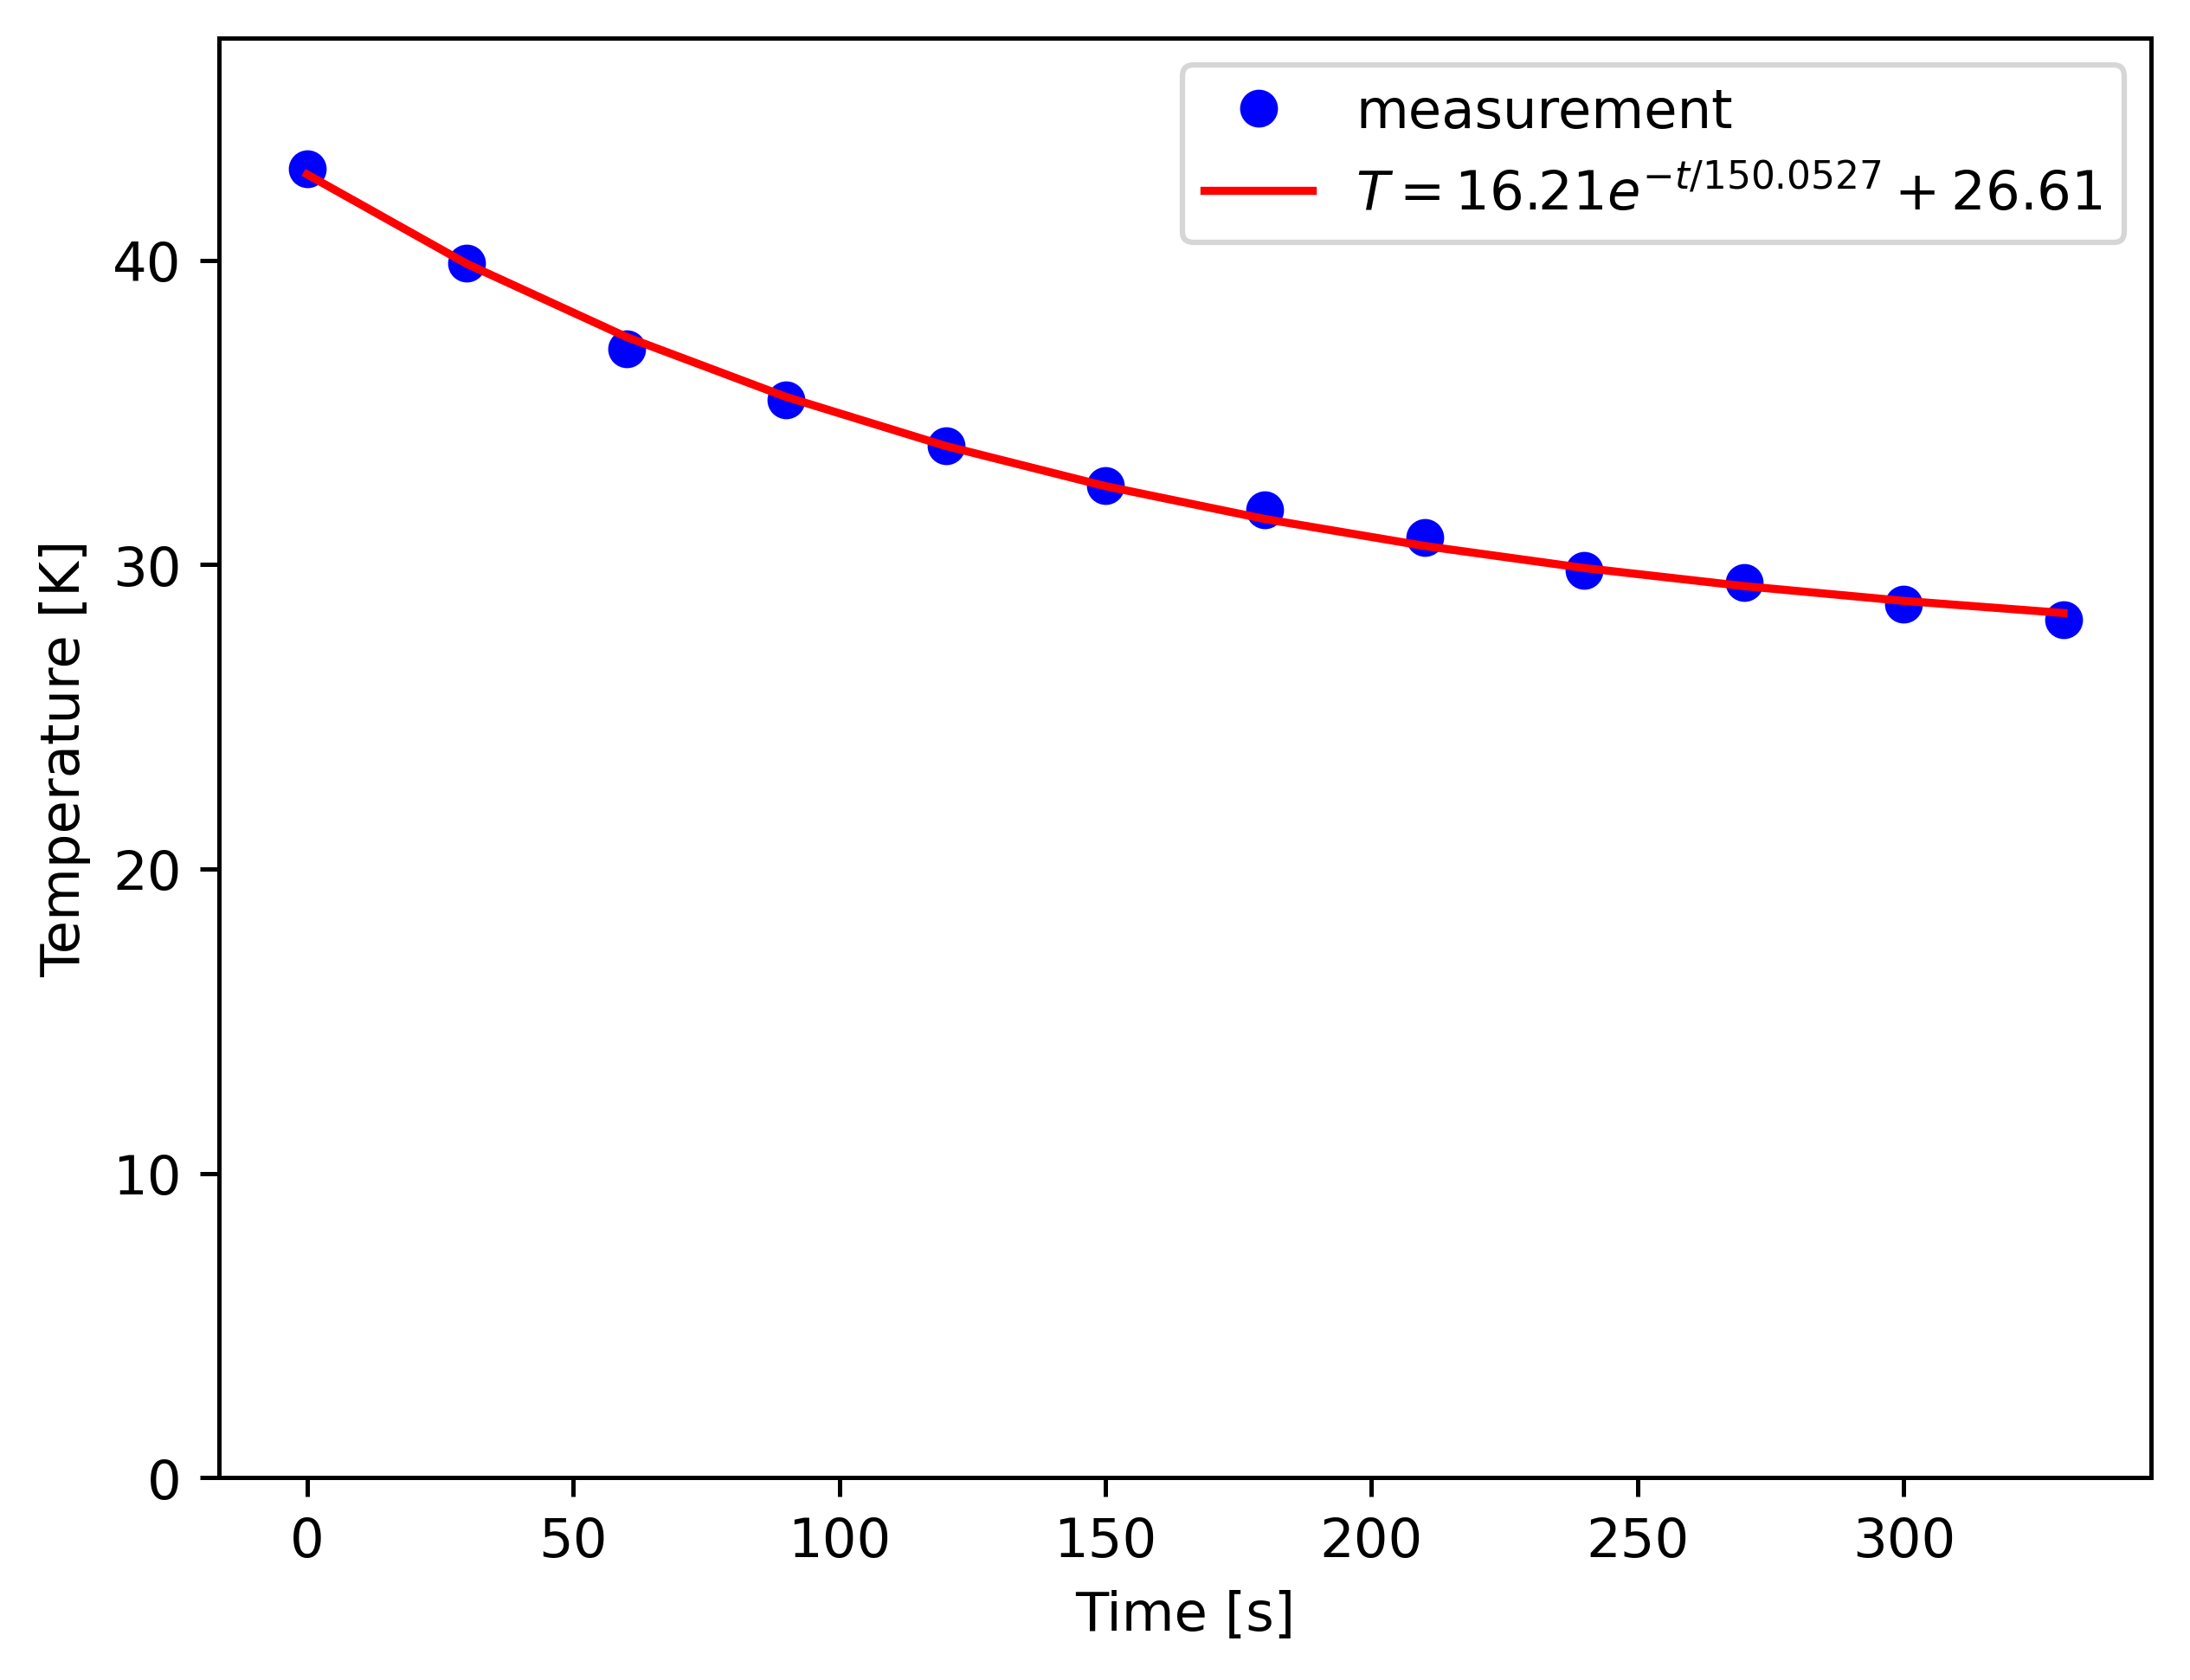

tau: 150.0526755134745 s
h: 21.376493214957456 W/(m^2 K)


In [6]:
# Hier de data en de analyse
# configuratie 1 zonder dop
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

def exp_func(t, A, tau, T_omg):
    # A is verschiltemperatuur met omgeving aan start
    # tau is de karakteristieke tijd voor de koeling
    # T_omg is de omgevingstemperatuur
    return (A * np.exp(-t/tau) + T_omg)  

buitenoppervlak = 0.15829857062908248 # bepaal zelf in m^2
warmtecapaciteit = 507.75849514984503 # bepaal de warmtecapaciteit in J/K

times = np.array([0, 30, 60, 90, 120, 150, 180, 210, 240, 270, 300, 330])
temps = np.array([43.0, 39.9, 37.1, 35.4, 33.9, 32.6, 31.8, 30.9, 29.8, 29.4, 28.7, 28.2])


# pas beginwaardes aan naar schatting
# Het aantal maxfev moet wellicht hoger voor goede convergentie van de waarde
popt, pocv = curve_fit(exp_func, times, temps, p0=[12.8, 1000, 21.2], maxfev=5000)

A_exp, tau_exp, T_omg_exp = popt

y_fit = exp_func(times, *popt)

plt.figure(dpi=450)
plt.xlabel('Time [s]')
plt.ylabel('Temperature [K]')

plt.plot(times, temps, 'bo', label='measurement')
plt.plot(times, y_fit, 'r-', 
         label='$T = %0.2f e^{-t/%0.4f} + %0.2f$' % (A_exp, tau_exp, T_omg_exp))
plt.ylim(bottom=0, top= 1.1* max(temps))
plt.legend()

plt.show()
print("tau:", tau_exp, "s")
h_exp = (warmtecapaciteit) / (tau_exp * buitenoppervlak)
 
print("h:",h_exp, "W/(m^2 K)") # warmteoverdrachtscoëfficiënt in W/m^2 K
# Sla figuren op met  
# 
# plt.savefig("Figuren/naam.png", dpi=450)



37


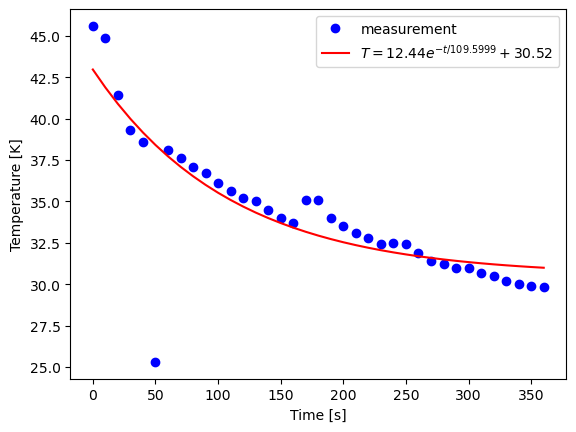

29.26644634398632


In [15]:
# Hier de data en de analyse
# configuratie 2
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

def exp_func(t, A, tau, T_omg):
    # A is verschiltemperatuur met omgeving aan start
    # tau is de karakteristieke tijd voor de koeling
    # T_omg is de omgevingstemperatuur
    return (A * np.exp(-t/tau) + T_omg)  

buitenoppervlak = 0.15829857062908248 # bepaal zelf in m^2
warmtecapaciteit = 507.75849514984503 # bepaal de warmtecapaciteit in J/K

times = np.linspace(0, 360, 37)
temps = np.array([45.6,44.9 ,41.4 ,39.3 ,38.6 , 25.3, 38.1, 37.6, 37.1, 36.7, 36.1, 35.6, 35.2, 35.0, 34.5, 34.0, 33.7, 35.1, 35.1, 34.0, 33.5, 33.1, 32.8, 32.4, 32.5, 32.4, 31.9, 31.4, 31.2, 31.0, 31.0, 30.7, 30.5, 30.2, 30.0, 29.9, 29.8])
print(len(temps))

# pas beginwaardes aan naar schatting
# Het aantal maxfev moet wellicht hoger voor goede convergentie van de waarde
popt, pocv = curve_fit(exp_func, times, temps, p0=[23.8, 100, 21.2], maxfev=5000)

A_exp, tau_exp, T_omg_exp = popt

y_fit = exp_func(times, *popt)

plt.figure()
plt.xlabel('Time [s]')
plt.ylabel('Temperature [K]')

plt.plot(times, temps, 'bo', label='measurement')
plt.plot(times, y_fit, 'r-', 
         label='$T = %0.2f e^{-t/%0.4f} + %0.2f$' % (A_exp, tau_exp, T_omg_exp))

plt.legend()

plt.show()

h_exp = (warmtecapaciteit) / (tau_exp * buitenoppervlak)
 
print(h_exp) # warmteoverdrachtscoëfficiënt in W/m^2 K
# Sla figuren op met  
# 
# plt.savefig("Figuren/naam.png", dpi=450)

[  0.   5.  10.  15.  20.  25.  30.  35.  40.  45.  50.  60.  70.  80.
  90. 100. 110. 120. 130. 140. 150. 160. 170. 180. 190. 200. 210. 220.
 230. 240. 250. 260. 270. 280. 290. 300. 310. 320. 330. 340. 350. 360.
 370. 380. 390. 400. 410. 420. 430. 440. 450. 460. 470. 480. 490. 500.
 510. 520. 530. 540. 550. 560. 570.]
63


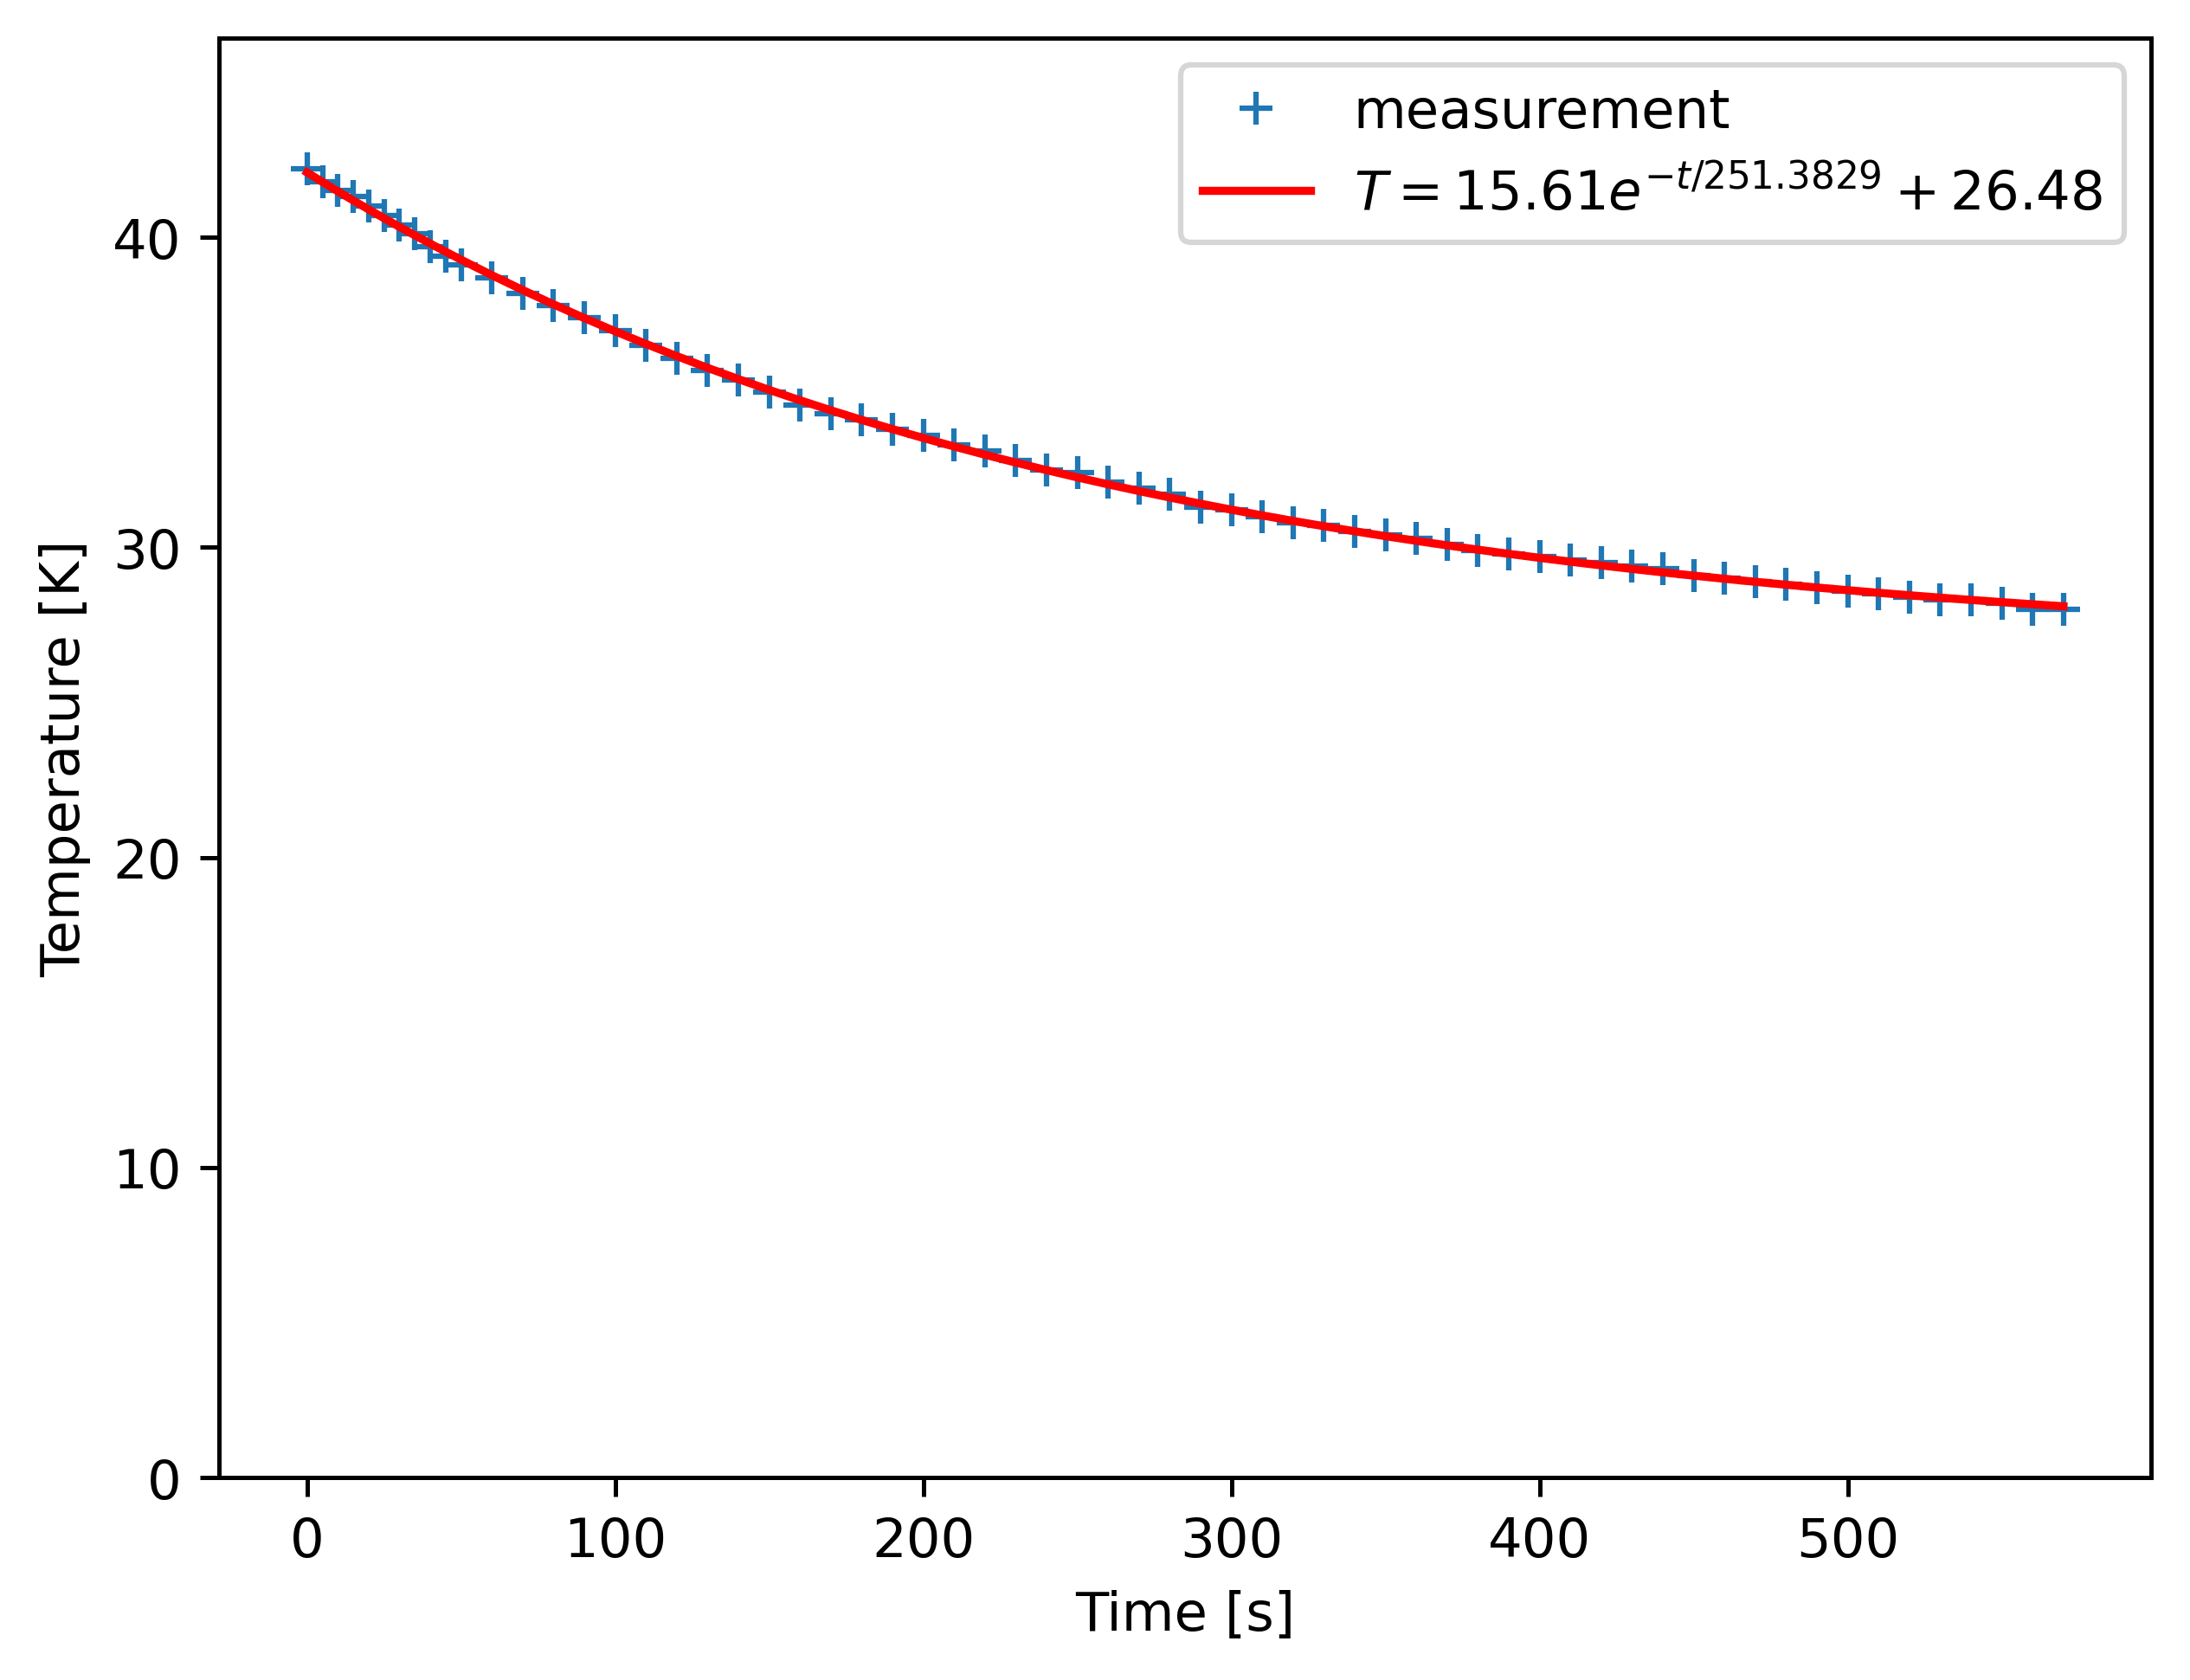

tau: 251.382904441542 s
h: 12.759817566456329 W/(m^2 K)


In [8]:
# Hier de data en de analyse
# configuratie 2, poging 2
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

def exp_func(t, A, tau, T_omg):
    # A is verschiltemperatuur met omgeving aan start
    # tau is de karakteristieke tijd voor de koeling
    # T_omg is de omgevingstemperatuur
    return (A * np.exp(-t/tau) + T_omg)  

buitenoppervlak = 0.15829857062908248 # bepaal zelf in m^2
warmtecapaciteit = 507.75849514984503 # bepaal de warmtecapaciteit in J/K

times = np.cumsum(np.concatenate((np.ones(11)*5, np.ones(52)*10))) - 5
print(times)

temps = np.array([42.2,41.8 ,41.5 ,41.3 ,41.0 ,40.7 ,40.4 ,40.1 ,39.7 ,39.4 ,39.1  , 38.7 ,38.2 ,37.8 ,37.4, 37.0, 36.5, 36.1, 35.7, 35.4, 35.0, 34.6, 34.3, 34.1, 33.8, 33.6, 33.3, 33.1, 32.8, 32.5, 32.4, 32.1, 31.9, 31.7, 31.3, 31.2, 31.0, 30.8, 30.7, 30.5, 30.4, 30.3, 30.1, 29.9, 29.8, 29.7, 29.6, 29.5, 29.4, 29.3, 29.1, 29.0, 28.9, 28.8, 28.7, 28.6, 28.5, 28.4, 28.3, 28.3, 28.2, 28.0, 28.0])
print(len(temps))

# pas beginwaardes aan naar schatting
# Het aantal maxfev moet wellicht hoger voor goede convergentie van de waarde
popt, pocv = curve_fit(exp_func, times, temps, p0=[21.0, 100, 21.2], maxfev=5000)

A_exp, tau_exp, T_omg_exp = popt

y_fit = exp_func(times, *popt)

plt.figure(dpi=450)
plt.xlabel('Time [s]')
plt.ylabel('Temperature [K]')

plt.plot(times, temps, '+', label='measurement')
plt.plot(times, y_fit, 'r-', 
         label='$T = %0.2f e^{-t/%0.4f} + %0.2f$' % (A_exp, tau_exp, T_omg_exp))
plt.ylim(bottom=0, top= 1.1* max(temps))
plt.legend()

plt.show()
print("tau:", tau_exp, "s")
h_exp = (warmtecapaciteit) / (tau_exp * buitenoppervlak)
 
print("h:",h_exp, "W/(m^2 K)") # warmteoverdrachtscoëfficiënt in W/m^2 K
# Sla figuren op met  
# 
# plt.savefig("Figuren/naam.png", dpi=450)

# Discussie en conclusie


#your code/answer
Het eerste aantal metingen van elk meetproces (met of zonder dop op de aluminium buis) heeft een veel grotere onzekere waarde dan de latere metingen, omdat de de buis in het begin erg snel (exponentieel snel) afkoelt. Wat we hebben bedacht - na de metingen van het eerste proces - is om een kleinere tijdsstap te kiezen bij de eerste metingen om het exponentiele gedrag goed in kaart te brengen. Bij het meetproces zonder dop (het eerste meetproces) had dit beter gekund.

De meetapparatuur is nauwkeurig genoeg voor de benodigde nauwkeurigheid van dit experiment. Het is ook goed dat alle onzekerheden in de grafeken zijn toegepast middels errorbars (!). 
De massa van de buis die gemeten is, komt niet helemaal overeen met de gewogen massa. Dit is dus ook een onnauwkeurigheid.
Ook is het niet representatief dat alleen circa 1 procent van de oppervlakte van de buitenkant van de buis is gemeten op temperatuursverandering.

Wat er goed is gedaan in dit experiment is dat de ramen en deuren dicht zijn gehouden, zodat lokale temperatuursverschillen door tocht of een koude buitenlucht, het experiment niet significant konden beinvloeden. 
Echter, er zijn een aantal verbeterpunten om de experimenteel bepaalde warmteoverdrachtscoëfficiënt dichter bij de fabriekswaarde te krijgen. Zo kan je, naast dat je temperatuur van de buis meet, ook de temperatuursverandering van een afgesloten ruimte om de buis heen meten gedurende het koelproces. Dit zorgt ervoor dat je zeker weet dat alleen de temperatuursverandering van de verdwenen warmte wordt gemeten. Door het in een afgesloten ruimte te bewaren, weet je zeker dat lokale temperatuursverschillen geen invloed kunnen hebben op de gemeten afkoeling.
